In [1]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import glob
import time

#### Function to create one dataframe from all individual monthly files

In [2]:
def create_df():
    
    #Total excel files = 204
    #Individual File shape = (852, 6)
    #Final Dataframe shape = (173808, 8)
    
    column_names = ["row_no", "min_K", "max_K", "mean_K", "geoid", "name"] #List of column names of individual files
    path = "narr_urban_county_data/air.sfc"
    all_files = glob.glob(path + "/*.csv")
    data = pd.DataFrame(columns = column_names) #Defining an empty dataframe
    for filename in all_files:
        temp_df = pd.read_csv(filename, index_col=None, header=0, names=column_names) #Individual files in a temp dataframe
        year = filename[-11:-7]
        month = filename[-6:-4]
        temp_df.insert(6, "year", year) #Adding year and month from filename for further use
        temp_df.insert(7, "month", month)
        temp_df["date"] = pd.to_datetime(temp_df[['year','month']].assign(DAY=1))
        data = data.append(temp_df, ignore_index=True, sort=False) #The temp dataframe is not appended to final df
    idx = pd.date_range('1999-01-01', '2015-12-01', freq='MS') #Specifying the datetime index
    data = data[["name", "date", "year", "month", "max_K", "mean_K", "min_K", "geoid"]] #Re-ordering the columns
    
    return data

## Creating the dataframe

In [3]:
# Temperature Data

start = time.process_time() #To calculate the time taken to read 204 files
data = create_df()   
print("Dataframe created in ", time.process_time() - start, "seconds")
print("Shape of the Dataframe: ", data.shape)
data.head(5)

Dataframe created in  10.166789999999999 seconds
Shape of the Dataframe:  (173808, 8)


,name,date,year,month,max_K,mean_K,min_K,geoid
0,Lancaster,2005-04-01,2005,04,287.734802,287.612427,287.537933,31109
1,Minnehaha,2005-04-01,2005,04,287.369446,286.633260,285.855377,46099
2,Allen,2005-04-01,2005,04,284.916840,284.776489,284.636108,39003
3,Beaver,2005-04-01,2005,04,283.967102,283.803630,283.577515,42007
4,Chatham,2005-04-01,2005,04,288.692871,288.243927,287.893127,37037


In [4]:
#WNV Incedence Rate (IR) data

wnv = pd.read_csv("WNV_NI_NNI_1999to2015_prevalence_incidence_final_20180530.csv", encoding="ISO-8859-1")
print("Shape of the Dataframe: ", wnv.shape)
wnv.head(2)

Shape of the Dataframe:  (3108, 153)


,GEOID10,Select_County,STATEFP10,STATENS,STUSPS,STNAME,COUNTYFP10,COUNTYNS10,CTYNAME,POPESTIMATE1999,...,NIIR_2011_Z,NIIR_2012_Z,NIIR_2013_Z,NIIR_2014_Z,NIIR_2015_Z,NIIR_EST_AVG_Z,NIIR_EST_MED_Z,County_WNV_Class,County_WNV_Class2,filter_$
0,1001,1,1,1779775,AL,Alabama,1,161526,Autauga County,42963,...,-.172668378274114,-.313041876784145,-.237005866057391,-.211466937746909,-.197767338621807,-.230659201920693,-.231569016088473,2,NI-S,0
1,1003,1,1,1779775,AL,Alabama,3,161527,Baldwin County,137555,...,-.172668378274114,.0148439683883608,-.177634573907632,-.211466937746909,-.197767338621807,-.177866829768146,-.186748999098691,4,NI-M-pre12,0


### Adding climate zone column to the dataframe

In [5]:
ansi = pd.read_csv("ANSI.csv")
ansi_dict = ansi.set_index('ANSI').state.to_dict()
print(ansi_dict)

{1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY', 60: 'AS', 66: 'GU', 69: 'MP', 72: 'PR', 74: 'UM', 78: 'VI'}


In [6]:
print(data.dtypes)
data.head(2)

name              object
date      datetime64[ns]
year              object
month             object
max_K            float64
mean_K           float64
min_K            float64
geoid             object
dtype: object


,name,date,year,month,max_K,mean_K,min_K,geoid
0,Lancaster,2005-04-01,2005,04,287.734802,287.612427,287.537933,31109
1,Minnehaha,2005-04-01,2005,04,287.369446,286.633260,285.855377,46099


In [7]:
data['ansi'] = data['geoid'].astype(str).str[:2]
data['ansi'] = data['ansi'].astype(int)
data['state'] = data['ansi'].map(ansi_dict)
data.head(2)

,name,date,year,month,max_K,mean_K,min_K,geoid,ansi,state
0,Lancaster,2005-04-01,2005,04,287.734802,287.612427,287.537933,31109,31,NE
1,Minnehaha,2005-04-01,2005,04,287.369446,286.633260,285.855377,46099,46,SD


### Adding Climate Zone column
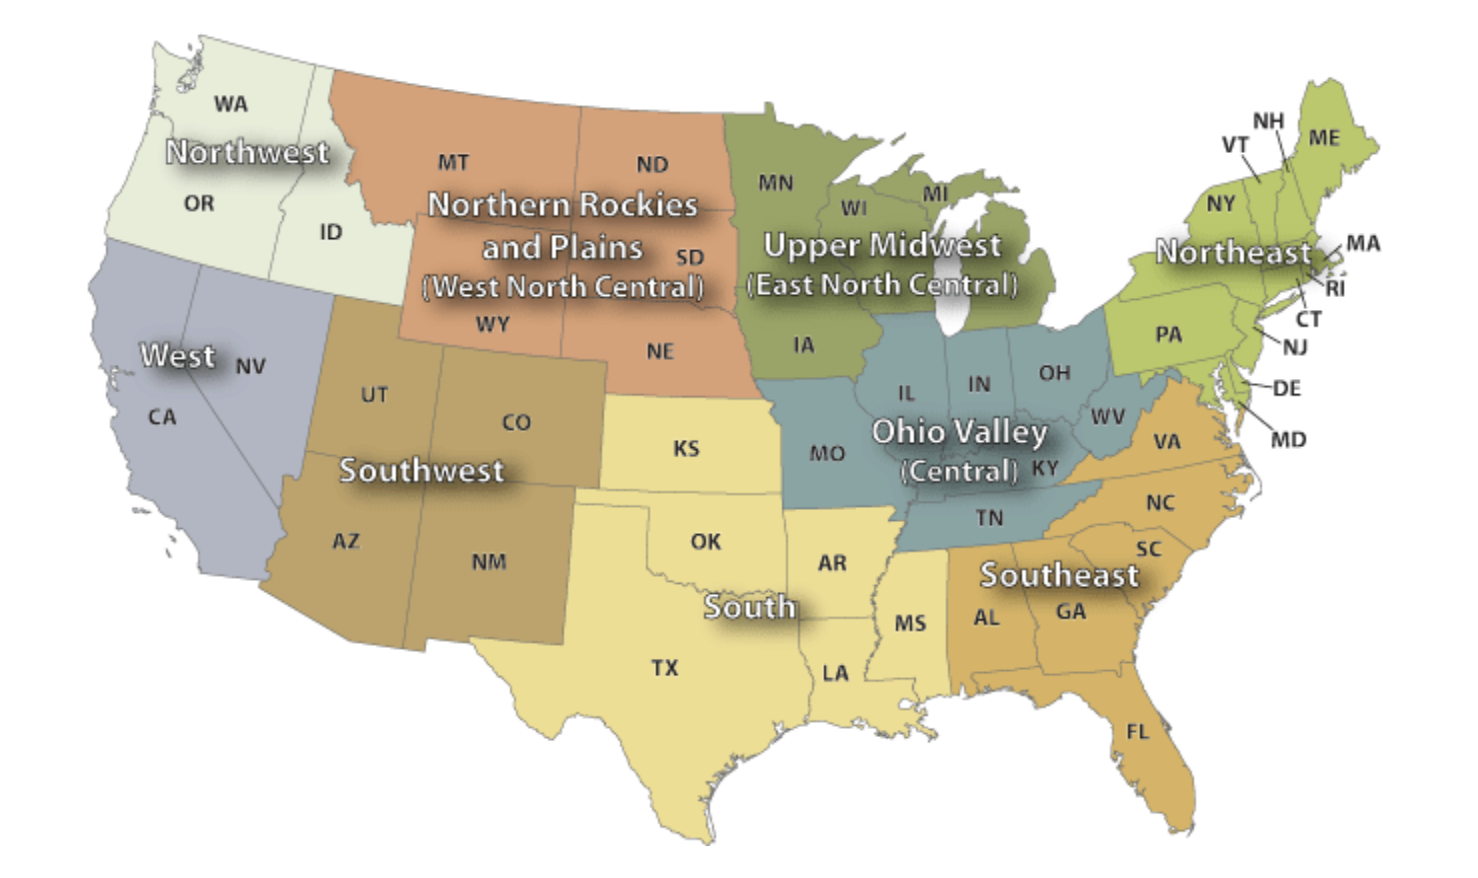
#### Central (c) , East North Central (enc) , Northeast (ne) , Northwest (nw) , South (s) , Southeast (se) , Southwest (sw) , West (w) , West North Central (wnc)

In [8]:
#Creating climate dictionary
#Creating it this way as it is easier to type but this dictionary cannot be used to create climate zone column
climate_dict = {'wnc' : ['MT','NE','ND','SD','WY'],
                'enc' : ['IA','MI','MN','WI'],
                'nw' : ['ID','OR','WA'],
                'ne' : ['CT','DE','ME','MD','MA','NH','NJ','NY','PA','RI','VT'],
                'se' : ['AL','FL','GA','NC','SC','VA'],
                'sw' : ['AZ','CO','NM','UT'],
                'c' : ['IL','IN','KY','MO','OH','TN','WV'],
                's' : ['AR','KS','LA','MS','OK','TX'],
                'w' : ['CA','NV']
               }

#The new dictionary swaps keys and values from above dictionary to create the climate zone column
climate_dict2 = {} 
for key, value in climate_dict.items():
    for items in value:
        climate_dict2[items]=key
        
print(climate_dict2)

{'MT': 'wnc', 'NE': 'wnc', 'ND': 'wnc', 'SD': 'wnc', 'WY': 'wnc', 'IA': 'enc', 'MI': 'enc', 'MN': 'enc', 'WI': 'enc', 'ID': 'nw', 'OR': 'nw', 'WA': 'nw', 'CT': 'ne', 'DE': 'ne', 'ME': 'ne', 'MD': 'ne', 'MA': 'ne', 'NH': 'ne', 'NJ': 'ne', 'NY': 'ne', 'PA': 'ne', 'RI': 'ne', 'VT': 'ne', 'AL': 'se', 'FL': 'se', 'GA': 'se', 'NC': 'se', 'SC': 'se', 'VA': 'se', 'AZ': 'sw', 'CO': 'sw', 'NM': 'sw', 'UT': 'sw', 'IL': 'c', 'IN': 'c', 'KY': 'c', 'MO': 'c', 'OH': 'c', 'TN': 'c', 'WV': 'c', 'AR': 's', 'KS': 's', 'LA': 's', 'MS': 's', 'OK': 's', 'TX': 's', 'CA': 'w', 'NV': 'w'}


In [9]:
data['climate_zone'] = data['state'].map(climate_dict2)
data.head(5)

,name,date,year,month,max_K,mean_K,min_K,geoid,ansi,state,climate_zone
0,Lancaster,2005-04-01,2005,04,287.734802,287.612427,287.537933,31109,31,NE,wnc
1,Minnehaha,2005-04-01,2005,04,287.369446,286.633260,285.855377,46099,46,SD,wnc
2,Allen,2005-04-01,2005,04,284.916840,284.776489,284.636108,39003,39,OH,c
3,Beaver,2005-04-01,2005,04,283.967102,283.803630,283.577515,42007,42,PA,ne
4,Chatham,2005-04-01,2005,04,288.692871,288.243927,287.893127,37037,37,NC,se
